# [TEMPLATE] DATASET DEPURADO

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="darkgrid") # seteando tipo de grid en seaborn
sns.set(color_codes=True)

In [20]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [21]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [22]:
df2 = df.copy()

In [23]:
df2['count'] = 1

In [35]:
cantidad_por_tipo = df2.groupby('tipodepropiedad').agg({"count":"sum"}).reset_index()
cantidad_por_tipo['log_count'] = np.log(cantidad_por_tipo['count']+1)

In [40]:
cantidad_por_tipo = cantidad_por_tipo.sort_values('log_count').reset_index()

In [41]:
cantidad_por_tipo

,index,tipodepropiedad,count,log_count
0,23,Garage,1,0.693147
1,22,Hospedaje,1,0.693147
2,12,Lote,5,1.791759
3,8,Huerta,20,3.044522
4,20,Terreno industrial,31,3.465736
5,13,Nave industrial,76,4.343805
6,15,Otros,134,4.905275
7,5,Departamento Compartido,141,4.955827
8,11,Local en centro comercial,165,5.111988
9,17,Rancho,170,5.141664


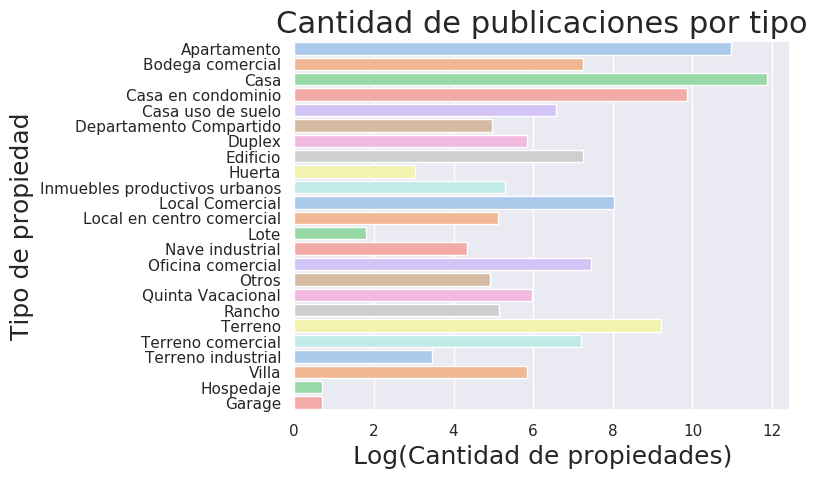

In [47]:
g = sns.barplot(x='log_count', y='tipodepropiedad', data=cantidad_por_tipo, palette='pastel')
g.set_title("Cantidad de publicaciones por tipo", fontsize=22)
g.set_xlabel("Log(Cantidad de propiedades)",fontsize=18)
g.set_ylabel("Tipo de propiedad", fontsize=18)
g.figure.savefig("Distribucion de tipos de propiedades.png", bbox_inches='tight')